# Titanic Lab

## Step 1: Read in the data

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [179]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column

In [181]:
titanic_na = titanic.isna().sum()
titanic_na

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

''

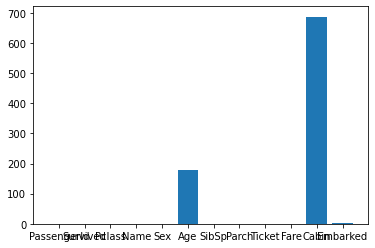

In [182]:
plt.bar(titanic_na.index, titanic_na)
;

- *Bonus* : Theres a good library for visualizing missing values called Missingno.

''

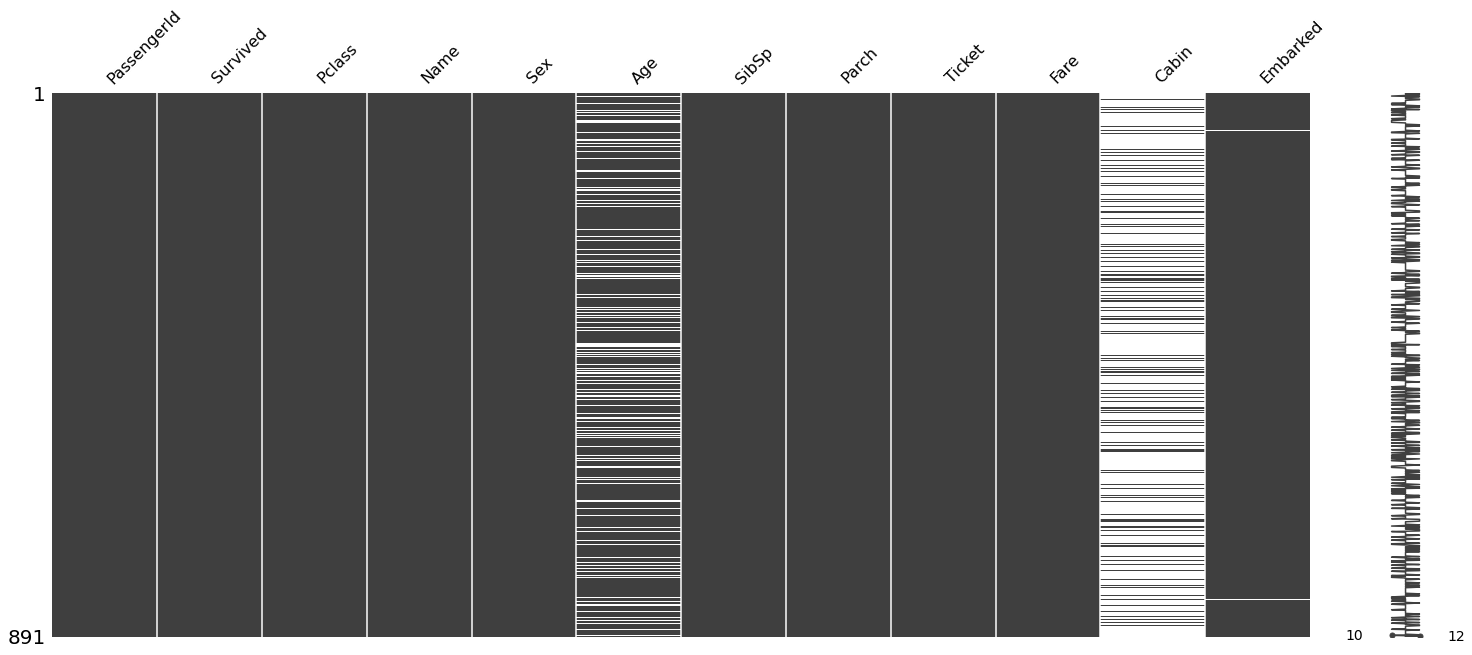

In [183]:
msno.matrix(titanic)
;

''

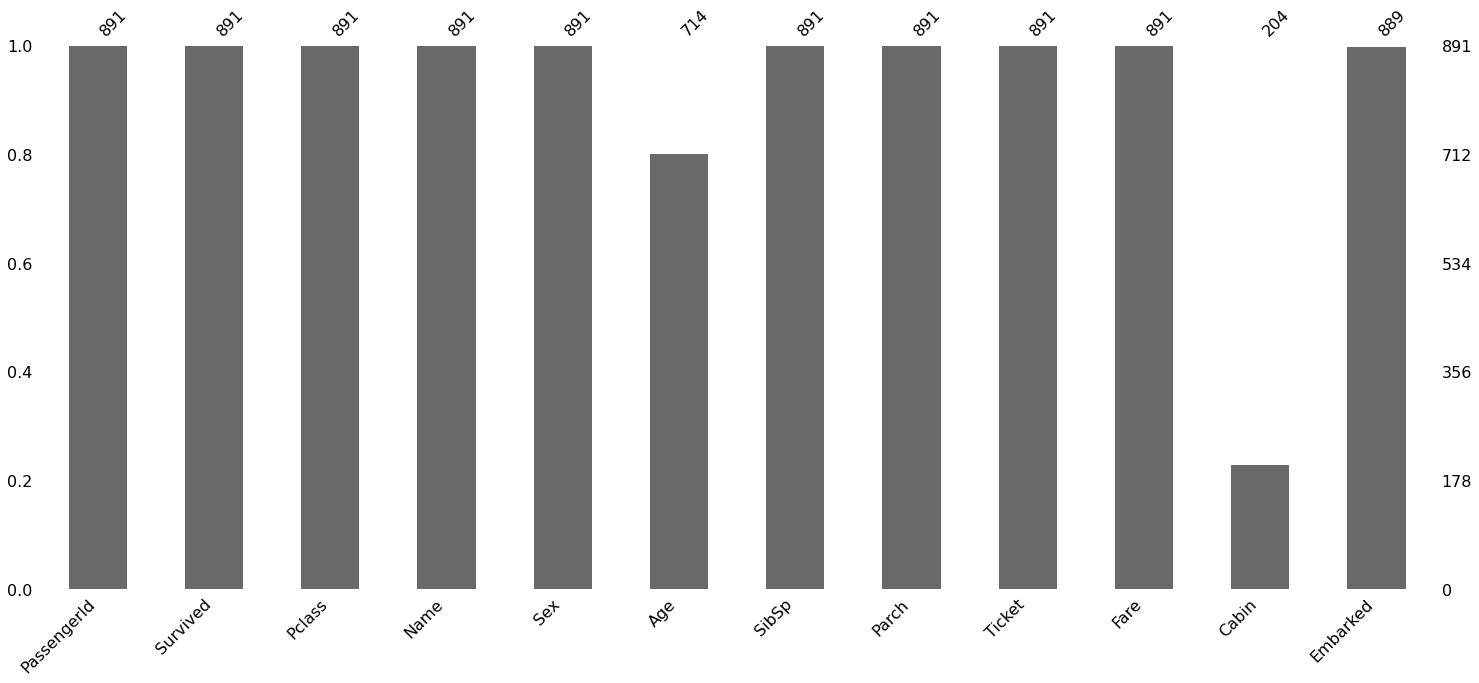

In [184]:
msno.bar(titanic)
;

2. Which column has the most `NaN` values? How many cells in that column are empty?

The "Cabin" column has the most missing values, with 687 missing values.

3. Delete all rows where `Embarked` is empty.

In [185]:
titanic.dropna(subset=['Embarked'], inplace=True)

4. Fill all empty cabins with these symbols: **¯\\_(ツ)_/¯**

In [186]:
titanic['Cabin'].fillna('¯\\_(ツ)_/¯', inplace=True)

## Step 3: Feature extraction

1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [188]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [189]:
titanic['IsReverend'] = titanic['Name'].map(lambda x: 1 if 'Rev.' in x.split()[1] else 0)
titanic['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

3. Create 3 new columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column.

In [191]:
titanic['Embarked_C'] = titanic['Embarked'].map(lambda x: 1 if x == 'C' else 0)
titanic['Embarked_C'].value_counts()

0    721
1    168
Name: Embarked_C, dtype: int64

In [192]:
titanic['Embarked_Q'] = titanic['Embarked'].map(lambda x: 1 if x == 'Q' else 0)
titanic['Embarked_Q'].value_counts()

0    812
1     77
Name: Embarked_Q, dtype: int64

In [193]:
titanic['Embarked_S'] = titanic['Embarked'].map(lambda x: 1 if x == 'S' else 0)
titanic['Embarked_S'].value_counts()

1    644
0    245
Name: Embarked_S, dtype: int64

In [194]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?

In [198]:
survival_rate = round((titanic['Survived'].sum() / titanic.shape[0])*100,2)
print(f"{survival_rate}%")

38.25%


2. Which gender fared the worst? What was their survival rate?

In [200]:
female_passengers = titanic['Sex'].value_counts()['female']
female_passengers

312

In [201]:
female_survivors = titanic[titanic['Sex'] == 'female']['Survived'].sum()
female_survivors

231

In [202]:
female_survival_rate = female_survivors / female_passengers
female_survival_rate

0.7403846153846154

In [203]:
male_passengers = titanic['Sex'].value_counts()['male']
male_passengers

577

In [204]:
male_survivors = titanic[titanic['Sex'] == 'male']['Survived'].sum()
male_survivors

109

In [205]:
male_survival_rate = male_survivors / male_passengers
male_survival_rate

0.18890814558058924

Females fared much bettter with a 74% survival rate vs. a 19% survival rate for men.

3. What was the survival rate for each `Pclass`?

In [206]:
by_class = titanic.groupby(by='Pclass').sum()
by_class

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
Pclass,,,,,,,,,,,
1,98813,134,7011.42,90,77,18017.4125,167,0,85,2,127
2,82056,87,5168.83,74,70,3801.8417,144,6,17,3,164
3,215625,119,8924.92,302,193,6714.6951,495,0,66,72,353


In [207]:
survivors_by_class = by_class['Survived'] / (by_class['Embarked_C'] + by_class['Embarked_Q'] + by_class['Embarked_S'])
survivors_by_class

Pclass
1    0.626168
2    0.472826
3    0.242363
dtype: float64

4. Did any reverends survive? How many?
    No Reverends survived

In [208]:
titanic[(titanic['Survived'] == 1) & (titanic['IsReverend'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S


5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [216]:
titanic[(titanic['Survived'] == 1) & (titanic['Cabin'] == '¯\\_(ツ)_/¯')]['Survived'].sum() / titanic.shape[0]

0.23172103487064116

6. What is the survival rate for people whose `Age` is empty?

In [224]:
titanic[(titanic['Survived'] == 1) & (titanic['Age'].isna())]['Survived'].sum() / titanic.shape[0]

0.05849268841394826

7. What is the survival rate for each port of embarkation?

In [229]:
(titanic.groupby(by='Embarked_C').sum()['Survived'] / titanic.shape[0])[1]

0.1046119235095613

In [230]:
(titanic.groupby(by='Embarked_Q').sum()['Survived'] / titanic.shape[0])[1]

0.03374578177727784

In [231]:
(titanic.groupby(by='Embarked_S').sum()['Survived'] / titanic.shape[0])[1]

0.2440944881889764

8. What is the survival rate for children (under 12) in each `Pclass`?

In [237]:
titanic[(titanic['Survived'] == 1) & (titanic['Age'] <= 12)].groupby('Pclass').sum()['Survived']/891

Pclass
1    0.003367
2    0.019080
3    0.022447
Name: Survived, dtype: float64

9. Did the captain of the ship survive? Are they on the list?

Google searched captain's name: Edward Smith

https://www.google.com/search?gs_ssp=eJzj4tTP1TcwKi-zNDZg9OIvySxJzMtMVkhOLChJzMwDAHe5CRA&q=titanic+captain&rlz=1C5CHFA_enUS898US898&oq=titanic+cap&aqs=chrome.1.69i57j46i433i512j0i512l2j46i512j0i512l4.5213j0j7&sourceid=chrome&ie=UTF-8

In [252]:
titanic['Name'].map(lambda x: x if 'Smith' in x.split()[0] else 0).value_counts()

0                             885
Smith, Mr. James Clinch         1
Smith, Mr. Thomas               1
Smith, Mr. Richard William      1
Smith, Miss. Marion Elsie       1
Name: Name, dtype: int64

There are no Edward Smith's on the list.

10. Of all the people that died, who had the most expensive ticket? How much did it cost?

Mr. Mark Fortune and Mr. Charles Fortune paid 263 (dollars?) each, and died.

In [262]:
titanic[titanic['Survived'] == 0].sort_values('Fare', ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,1


11. Does having family on the boat help or hurt your chances of survival?

Survival rate was higher for passengers with family

In [265]:
survivors = titanic[titanic['Survived'] != 0]

In [271]:
survivors[(titanic['SibSp'] != 0) | (titanic['Parch'] != 0)]['Survived'].sum() / titanic.shape[0]

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_56273/3300822026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors[(titanic['SibSp'] != 0) | (titanic['Parch'] != 0)]['Survived'].sum() / titanic.shape[0]


0.2013498312710911

In [272]:
survivors[(titanic['SibSp'] == 0) & (titanic['Parch'] == 0)]['Survived'].sum() / titanic.shape[0]

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_56273/247290777.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors[(titanic['SibSp'] == 0) & (titanic['Parch'] == 0)]['Survived'].sum() / titanic.shape[0]


0.18110236220472442

## Step 5: Plotting
1. Using Matplotlib and Seaborn, create several plots showing the survival rates of different groups of people.

In [292]:
surv_by_sex = titanic.groupby('Sex').sum()
surv_by_sex['surv_rate'] = surv_by_sex['Survived'] / 891
surv_by_sex = surv_by_sex[['surv_rate']]
surv_by_sex

,surv_rate
Sex,
female,0.259259
male,0.122334


''

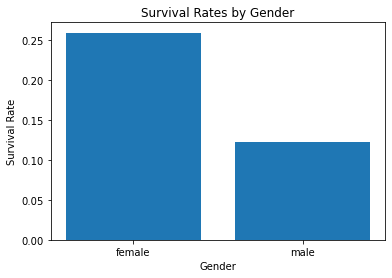

In [299]:
plt.bar(surv_by_sex.index, surv_by_sex['surv_rate'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
;

2. Create another plot of your choice and explain in words something that it shows.